### Mount my drive and import libraries

In [ ]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)  

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/mps_py")  

In [ ]:
import MPS_utils # import the main .py script

In [ ]:
import matplotlib.pyplot as plt  # helper libraries
import pandas as pd 
import tensorflow as tf


%matplotlib inline
print(tf.__version__) 

2.4.1


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found') 
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Load MNIST dataset

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(28, 28)


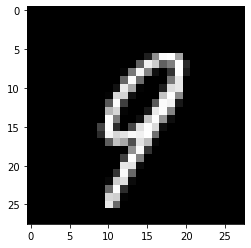

In [ ]:
image_index = 22
print(train_images[image_index].shape) 
plt.imshow(train_images[image_index], cmap='gray')

### Dataset preparation

In [ ]:
training, one_hot, test, one_hot_test = MPS_utils.dataset_preparation(train_images,train_labels,test_images,test_labels)


### GO with the training

In [ ]:
fit = MPS_utils.MPS_training(train_dim = training.shape[1], label_one_dim=10, bond_dim=10,
                 training_set=training, training_label=one_hot, test_set=test, test_label=one_hot_test,
                 batch_size=10, epochs=100, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

Epoch 1/100
6000/6000 [==============================] - 31s 5ms/step - loss: 0.4789 - accuracy: 0.8448 - val_loss: 0.1425 - val_accuracy: 0.9570
Epoch 2/100
6000/6000 [==============================] - 27s 5ms/step - loss: 0.1366 - accuracy: 0.9609 - val_loss: 0.1036 - val_accuracy: 0.9680
Epoch 3/100
6000/6000 [==============================] - 27s 5ms/step - loss: 0.1011 - accuracy: 0.9704 - val_loss: 0.1229 - val_accuracy: 0.9708
Epoch 4/100
6000/6000 [==============================] - 27s 5ms/step - loss: 0.0857 - accuracy: 0.9755 - val_loss: 0.1025 - val_accuracy: 0.9743
Epoch 5/100
6000/6000 [==============================] - 27s 5ms/step - loss: 0.0759 - accuracy: 0.9785 - val_loss: 0.1052 - val_accuracy: 0.9722
Epoch 6/100
6000/6000 [==============================] - 27s 5ms/step - loss: 0.0729 - accuracy: 0.9782 - val_loss: 0.1084 - val_accuracy: 0.9724
Epoch 7/100
6000/6000 [==============================] - 27s 5ms/step - loss: 0.0661 - accuracy: 0.9811 - val_loss: 0.1232 -

### Visualize and save history

In [ ]:
import pandas as pd
b = pd.DataFrame(fit.history)
b.to_csv('MNIST_history_final.csv')
! cp MNIST_history_final.csv "drive/MyDrive/mps_py"

In [ ]:
b

In [ ]:
b['val_accuracy'].max()

0.9807999730110168

In [ ]:
b['accuracy'].max()

0.9939000010490417

### Plots

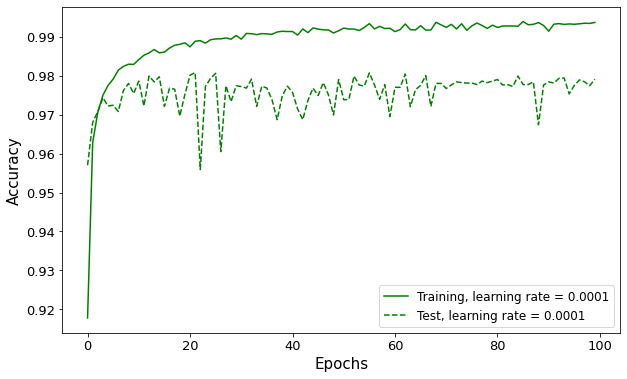

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(b['accuracy'], color='green',label='Training, learning rate = 0.0001')
plt.plot(b['val_accuracy'],color='green',linestyle='dashed',label='Test, learning rate = 0.0001') 
plt.legend(loc=4,prop={'size':12}) 
plt.tick_params(labelsize = 13)
plt.xlabel('Epochs',size=15)
plt.ylabel('Accuracy',size=15)

plt.show()

Text(0, 0.5, 'Loss')

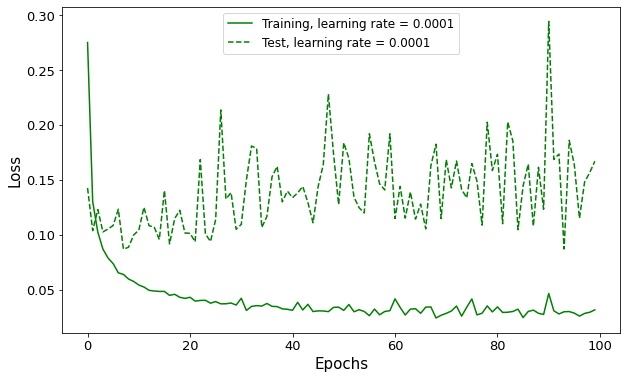

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(b['loss'], color='green',label='Training, learning rate = 0.0001')
plt.plot(b['val_loss'],color='green',linestyle='dashed',label='Test, learning rate = 0.0001') 
plt.legend(loc=0,prop={'size':12}) 
plt.tick_params(labelsize = 13)
plt.xlabel('Epochs',size=15)
plt.ylabel('Loss',size=15)